In [5]:
import sys
sys.path.insert(0, '/Users/kedzie/Documents/Berkeley/notebooks/utilities')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

from utility_functions.utils import * #read_data, read_press, getnearpos, folder_files, headspace
from matplotlib import rcParams as rc
rc['mathtext.default'] = 'regular'
rc['font.family'] = 'sans-serif'
rc['font.sans-serif'] = ['Verdana']
def oerorr(oer, orr):
    return(oer/orr)

charge current (mA): 0.49992718933333335
total moles of gas consumed: 34.5242601139704
total moles of gas evolved: 33.5899753376184
e- per mol on charge: 1.0529640555939614
e- per mol on discharge: 1.0018197838511016
discharge capacity: 0.9588116407394408
charge capacity: 0.9418828702635235
charge time (h) : 7.904906426469389
charge cap= 0.9418828702635235
oer/orr: <function oerorr at 0x7f9490dfbb90>
final current= 0.0050206496000000005
charge current (mA): 0.49990724769230777
total moles of gas consumed: 29.04220697959323
total moles of gas evolved: 28.175475838182123
e- per mol on charge: 1.0422789642708672
e- per mol on discharge: 0.9907411886166498
discharge capacity: 0.7751697301864624
charge capacity: 0.7797038099832005
charge time (h) : 4.96387405101253
charge cap= 0.7797038099832005
oer/orr: <function oerorr at 0x7f9490dfbb90>
final current= 0.0050371946
charge current (mA): 0.4998845421621622
total moles of gas consumed: 25.255286685243874
total moles of gas evolved: 24.460637

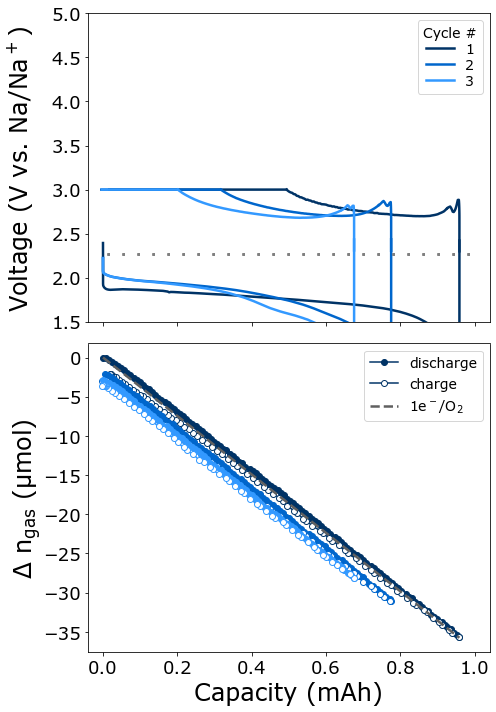

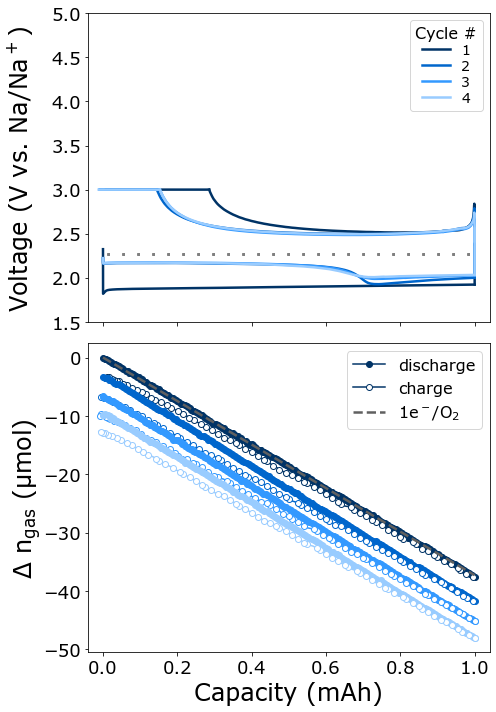

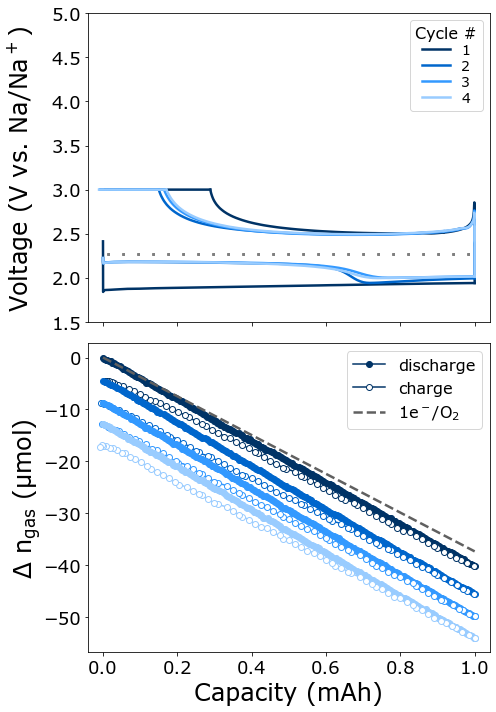

In [21]:

def plot_CA_cycles(discharge, cp1, cp2, ca, press, ch, cyclenum=1, leg=None, offset=0, n=1):
    
    i_dis = -1*np.mean( discharge['I/mA'] ) #calculate discharge and charge current (mA)
    i_ch = np.mean(cp1['I/mA'])
    print('charge current (mA): ' + str(i_ch))
    cp2['Capacity/mA.h'] = cp2['Capacity/mA.h'] + cp1['Capacity/mA.h'].iloc[-1]
    ca['Capacity/mA.h'] = ca['Capacity/mA.h'] + cp2['Capacity/mA.h'].iloc[-1]   
    umoles = press['pressure/torr']/760*headspace(ch)/(press['temperature/C']+273)/0.082057
    umoles = umoles-umoles.iloc[0]
    col = ['#003366', '#0066CC', '#3399FF', '#99CCFF']
    
    cap = []
    curr = []
    files_ec = pd.concat([discharge, cp1, cp2, ca], sort=True) 
    
    for i in range(len(umoles)):
        dex = getnearpos( files_ec['time/s'], press['time/s'].iloc[i] )
        cap.append( files_ec['Capacity/mA.h'].iloc[dex] )
        curr.append( files_ec['I/mA'].iloc[dex] )

    umolesdf = pd.DataFrame( press['time/s'], columns=['time/s'] )
    umolesdf['umoles'] = umoles
    umolesdf['Capacity/mA.h'] = cap
    umolesdf['I/mA'] = curr
    
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=cp1['time/s'].iloc[0]
    end2=cp1['time/s'].iloc[-1]
    st3=cp2['time/s'].iloc[0]
    end3=cp2['time/s'].iloc[-1]
    st4=ca['time/s'].iloc[0]
    end4=ca['time/s'].iloc[-1]
    end_cap = [discharge['Capacity/mA.h'].iloc[-1], cp1['Capacity/mA.h'].iloc[-1], cp2['Capacity/mA.h'].iloc[-1], ca['Capacity/mA.h'].iloc[-1]]

    ax.plot((discharge['Capacity/mA.h']), discharge['Ewe/V'], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label = cyclenum )
    ax.plot([end_cap[0], end_cap[0]-cp1['Capacity/mA.h'].iloc[5] ], [discharge['Ewe/V'].iloc[-1], cp1['Ewe/V'].iloc[5] ], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label='') #this line just connects the discharge to charge lines
    ax.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['Ewe/V'], color=col[cyclenum-1], label='', linewidth=2.5)
    ax.plot(end_cap[0]-cp2['Capacity/mA.h'], cp2['Ewe/V'], color=col[cyclenum-1] , label='', linewidth=2.5)
    ax.plot(end_cap[0]- ca['Capacity/mA.h'], ca['Ewe/V'], color= col[cyclenum-1], linewidth=2.5, label='') 
    ax.plot([0.01, 1.0],[2.27,2.27], c='grey', linestyle=(0,(1,5)), linewidth=2.5, label='')
#     ax3.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['I/mA'], color = '#EE7733', linestyle='--', linewidth=2.5)
#     ax3.plot(end_cap[0]-cp2['Capacity/mA.h'], cp2['I/mA'], color = '#EE7733', linestyle='--', linewidth=2.5)
#     ax3.plot(end_cap[0]-ca['Capacity/mA.h'], ca['I/mA'], color = '#EE7733', linestyle='--', linewidth=2.5)

    st_p1 = getnearpos(press['time/s'],st1) #find time at beginning of discharge
    end_p1 = getnearpos(press['time/s'],end1) #find time at end of discharge
    
    st_p2 = getnearpos(press['time/s'],st2) #start of charge cp1
    end_p2 = getnearpos(press['time/s'],end2)
    
    st_p3 = getnearpos(press['time/s'],st3)
    end_p3 = getnearpos(press['time/s'],end3)
    
    st_p4 = getnearpos(press['time/s'],st4)
    end_p4 = getnearpos(press['time/s'],end4) #end of charge chronoamperometry
    
    umolesdf['umoles'] = umolesdf['umoles']-umolesdf['umoles'].iloc[st_p1]
    
    x=[0, end_cap[0]]
    y=[0+offset,-end_cap[0]*3.6/n/96485*10**6+offset]
    
    print('total moles of gas consumed: ' + str(-umolesdf['umoles'].iloc[end_p1]+umoles.iloc[st_p1]))
    print('total moles of gas evolved: ' + str(umoles.iloc[end_p4]-umoles.iloc[st_p2]))
    
    epermol = ca['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[end_p4-1]-(umoles[st_p2+1]))
    epermold = discharge['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[st_p1]-(umoles[end_p1+1]))
    
    print("e- per mol on charge: " + str(epermol))
    print("e- per mol on discharge: " + str(epermold))
    print('discharge capacity: ' + str(discharge['Capacity/mA.h'].iloc[-1]))
    print('charge capacity: ' + str(ca['Capacity/mA.h'].iloc[-1]))
    print('charge time (h) : ' + str((ca['time/s'].iloc[-1]- cp1['time/s'].iloc[0])/3600))


    
    print('charge cap= ' + str( ca['Capacity/mA.h'].iloc[-1] ) )
    print('oer/orr: '+ str(oerorr))
    print('final current= ' + str(ca['I/mA'].iloc[-1]))
    pressure_gap=umoles.iloc[end_p1]-umoles.iloc[st_p2]
    
    ax2.plot(umolesdf['Capacity/mA.h'][st_p1:end_p1+1], umolesdf['umoles'][st_p1:end_p1+1]+offset,  'o-', color= col[cyclenum-1], linewidth=1.5, markersize=6, label='')#, markevery=(0.0,0.02))
    ax2.plot(end_cap[0]-umolesdf['Capacity/mA.h'][st_p2:end_p4-1], (umolesdf['umoles'])[st_p2:end_p4-1]+pressure_gap+offset,  'o-', color=col[cyclenum-1], linewidth=1.5, markersize=6, mfc='white', markevery=(0.0,0.013), label='')
    if cyclenum ==1:
        ax2.plot(x,y, color='#606060', linestyle='--', label= '',linewidth= 2.5)
    
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', fontsize=24, labelpad = 14 )
    ax2.set_ylabel('$\Delta$ n$_{gas}$ ($\mu$mol)', fontsize=24, labelpad=0)
    ax2.set_xlabel('Capacity (mAh)', fontsize=24)
    #ax3.set_ylabel('Current (mA))', fontsize=24, color='#EE7733' )
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    #ax3.tick_params(axis='both', which='major', labelsize=18)
    ax.set_ylim([1.5,5])
    ax.set_xlim([-0.04,1.04])
    if n==2:
        ax.set_ylim([2.5,4])
        ax.set_ylabel('Voltage (V vs. Li/Li$^+$)')
    plt.tight_layout()
    return ( umolesdf['umoles'][end_p4-1]+pressure_gap )

mc2_cycles = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/')
mc2_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy1_Ch2__2019-10-15_12.47_45.txt')
mc2_2= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy2_Ch2__2019-10-16_11.41_02.txt')
mc2_3= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy3_Ch2__2019-10-17_09.47_00.txt')
mc2_4= read_press ('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy4_Ch2__2019-10-17_16.07_50.txt')

colors = ['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

o1=plot_CA_cycles(mc2_cycles[1], mc2_cycles[3], mc2_cycles[4], mc2_cycles[5], mc2_1, 2, 1 )
o2=plot_CA_cycles(mc2_cycles[8], mc2_cycles[10], mc2_cycles[11], mc2_cycles[12], mc2_2, 2, 2, offset=o1)
o3= plot_CA_cycles(mc2_cycles[15], mc2_cycles[17], mc2_cycles[18], mc2_cycles[19], mc2_3, 2, 3,offset=o1+o2)
#plot_CA_cycles(mc2_cycles[22], mc2_cycles[24], mc2_cycles[25], mc2_cycles[26], mc2_4, 2, 4, '#99CCFF',offset=o1+o2+o3)

leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge', '1e$^-/O_2$'], fontsize=14)


p50_ca= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200625_Na_CA_P50_cycling_cell1/')
p50_ca_1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200625_Na_CA_P50_cycling_cell1/200625_Na_CA_P50_cycling_cell1_cycle1_press_Ch3__2020-06-25_11.19_34.txt')
p50_ca_2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200625_Na_CA_P50_cycling_cell1/200625_Na_CA_P50_cycling_cell1_cycle2_press_Ch3__2020-06-25_22.05_47.txt')
p50_ca_3 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200625_Na_CA_P50_cycling_cell1/200625_Na_CA_P50_cycling_cell1_cycle3_press_Ch3__2020-06-26_09.46_25.txt')
p50_ca_4 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200625_Na_CA_P50_cycling_cell1/200625_Na_CA_P50_cycling_cell1_cycle4_press_Ch3__2020-06-26_20.07_32.txt')
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

of1=plot_CA_cycles(p50_ca[1], p50_ca[3], p50_ca[4], p50_ca[5], p50_ca_1, 3, 1)
of2=plot_CA_cycles(p50_ca[8], p50_ca[10], p50_ca[11], p50_ca[12], p50_ca_2, 3, 2, offset=of1)
of3=plot_CA_cycles(p50_ca[15], p50_ca[17], p50_ca[18], p50_ca[19], p50_ca_3, 3, 3, offset=of1+of2)
of4=plot_CA_cycles(p50_ca[22], p50_ca[24], p50_ca[25], p50_ca[26], p50_ca_4, 3, 4, offset=of1+of2+of3)




leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':16})
ax2.legend(labels=['discharge', 'charge', '1e$^-/O_2$'], fontsize=16)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200625_Na_CA_P50_cycling_cell1/200625_p50_CA_cell1.pdf', transparent = True, dpi=600, bbox_inches='tight')



cell2_ca = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200625_Na_CA_P50_cycling_cell2/')
cell2_p1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200625_Na_CA_P50_cycling_cell2/200625_Na_CA_P50_cycling_cell2_cycle1_press_Ch4__2020-06-25_11.20_25.txt')
cell2_p2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200625_Na_CA_P50_cycling_cell2/200625_Na_CA_P50_cycling_cell2_cycle2_press_Ch4__2020-06-25_22.05_57.txt')
cell2_p3 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200625_Na_CA_P50_cycling_cell2/200625_Na_CA_P50_cycling_cell2_cycle3_press_Ch4__2020-06-26_09.46_29.txt')


fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

of1=plot_CA_cycles(cell2_ca[1], cell2_ca[3], cell2_ca[4], cell2_ca[5], cell2_p1, 4, 1)
of2=plot_CA_cycles(cell2_ca[8], cell2_ca[10], cell2_ca[11], cell2_ca[12], cell2_p2, 4, 2, offset=of1)
of3=plot_CA_cycles(cell2_ca[15], cell2_ca[17], cell2_ca[18], cell2_ca[19], cell2_p3, 4, 3, offset=of1+of2)
of4=plot_CA_cycles(cell2_ca[22], cell2_ca[24], cell2_ca[25], cell2_ca[26], cell2_p3, 4, 4, offset=of1+of2+of3)

leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':16})
ax2.legend(labels=['discharge', 'charge', '1e$^-/O_2$'], fontsize=16)



#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200625_Na_CA_P50_cycling_cell2/200625_p50_CA_cell2.pdf', transparent = True, dpi=600, bbox_inches='tight')




charge current (mA): 1.0002802278846155
total moles of gas consumed: 36.37743755049611
total moles of gas evolved: 32.7225128009711
e- per mol on charge: 1.1340483429485877
e- per mol on discharge: 1.022517416705166
discharge capacity: 0.9994999567667644
charge capacity: 0.9824434171120326
charge time (h) : 2.6760293564896984
charge cap= 0.9824434171120326
oer/orr: <function oerorr at 0x7f9490602710>
final current= 0.014995275
charge current (mA): 1.0003670261842104
total moles of gas consumed: 38.366271399842034
total moles of gas evolved: 34.16173766159419
e- per mol on charge: 1.1119069278601004
e- per mol on discharge: 0.2966968752111683
discharge capacity: 0.999484790696038
charge capacity: 1.007643217841784
charge time (h) : 2.6822115786370664
charge cap= 1.007643217841784
oer/orr: <function oerorr at 0x7f9490602710>
final current= 0.015042348
charge current (mA): 1.0002863354347826
total moles of gas consumed: 37.52695372232954
total moles of gas evolved: 34.31388883747131
e- pe

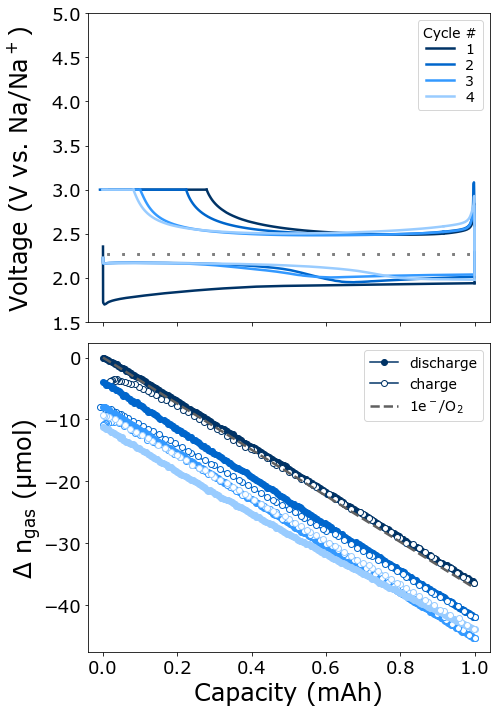

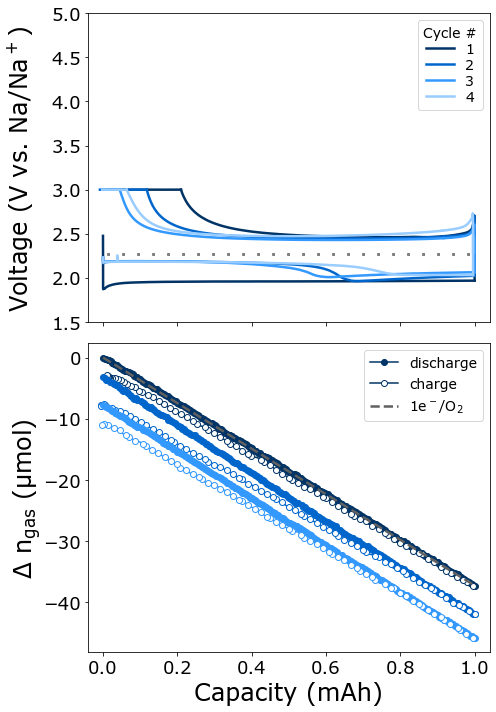

In [3]:
p50=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell1/')
p50_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell1/180814_Na_lowercurrents_cell1_cycle1_p_Ch4__2018-08-14_11.11_53.txt')
p50_2=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell1/180814_Na_lowercurrents_cell1_cycle2_p_Ch4__2018-08-14_16.49_14.txt')
p50_3=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell1/180814_Na_lowercurrents_cell1_cycle3_p_Ch4__2018-08-15_09.40_31.txt')
p50_4=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell1/180814_Na_lowercurrents_cell1_cycle4_p_Ch4__2018-08-15_14.37_07.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

o1=plot_CA_cycles(p50[3], p50[6], p50[7], p50[8], p50_1, 4, 1 )
o2=plot_CA_cycles(p50[13], p50[16], p50[17], p50[18],p50_2, 4, 2, offset=o1)
o3=plot_CA_cycles(p50[23], p50[26], p50[27], p50[28],p50_3, 4, 3, offset=o1+o2)
o4=plot_CA_cycles(p50[33], p50[36], p50[37], p50[38],p50_4, 4, 4, offset = o1+o2+o3)

leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge', '1e$^-$/O$_2$' ], fontsize=14)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell1/p50 CA cycling.pdf', transparent = True, dpi=600, bbox_inches='tight')

p502=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell2/')
p502_1=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell2/180814_Na_lowercurrents_cell2_cycle1_p_Ch5__2018-08-14_11.12_09.txt')
p502_2=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell2/180814_fixed_cycle2_pressure.txt')
p502_3=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell2/180814_Na_lowercurrents_cell2_cycle3_p_Ch5__2018-08-15_09.47_35.txt')
p502_4=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell2/180817_cycle4_pressure_fixed.txt')
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

o1=plot_CA_cycles(p502[3], p502[6], p502[7], p502[8], p502_1, 5, 1 )
o2=plot_CA_cycles(p502[13], p502[16], p502[17], p502[18],p502_2, 5, 2, offset=o1)
o3=plot_CA_cycles(p502[23], p502[26], p502[27], p502[28],p502_3, 5, 3, offset=o1+o2)
o4=plot_CA_cycles(p502[33], p502[36], p502[37], p502[38],p502_4, 5, 4, offset = o1+o2+o3)

leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge', '1e$^-$/O$_2$'], fontsize=14)



charge current (mA): 0.4999917981632654
total moles of gas consumed: 37.99025805173106
total moles of gas evolved: 34.710670778752444
e- per mol on charge: 1.0384216116534732
e- per mol on discharge: 0.9680887165881619
discharge capacity: 0.9996725453270806
charge capacity: 0.9616360420154202
charge time (h) : 6.337531312159173
charge cap= 0.9616360420154202
oer/orr: <function oerorr at 0x7fdf147a1f80>
final current= 0.0050289221
charge current (mA): 0.4999976783999999
total moles of gas consumed: 37.63295251127124
total moles of gas evolved: 36.38926554885002
e- per mol on charge: 1.0267559272788893
e- per mol on discharge: 0.984810029056183
discharge capacity: 0.9996405575010512
charge capacity: 0.9992707706987858
charge time (h) : 5.175253604008872
charge cap= 0.9992707706987858
oer/orr: <function oerorr at 0x7fdf147a1f80>
final current= 0.0050696479
charge current (mA): 0.5003681180180181
total moles of gas consumed: 9.145663223690505
total moles of gas evolved: 6.901437573196375
e

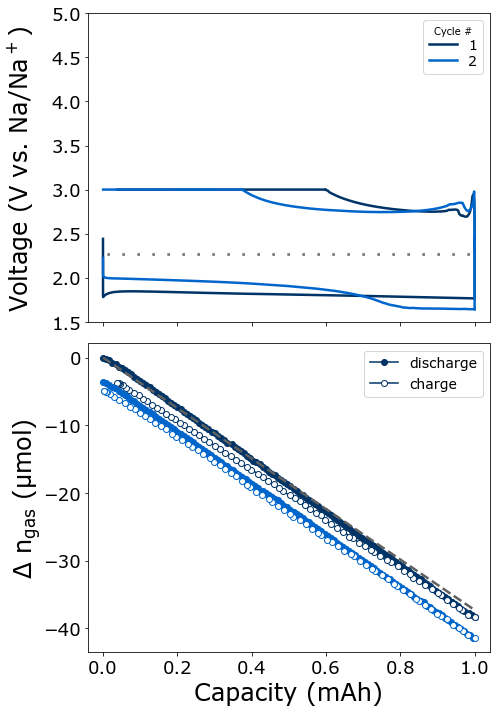

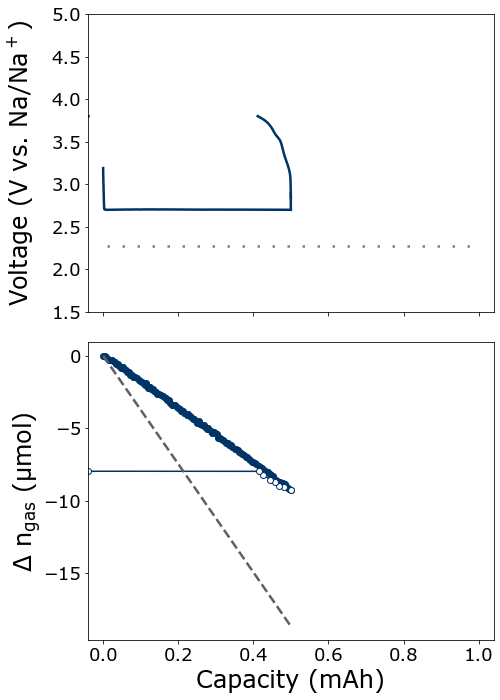

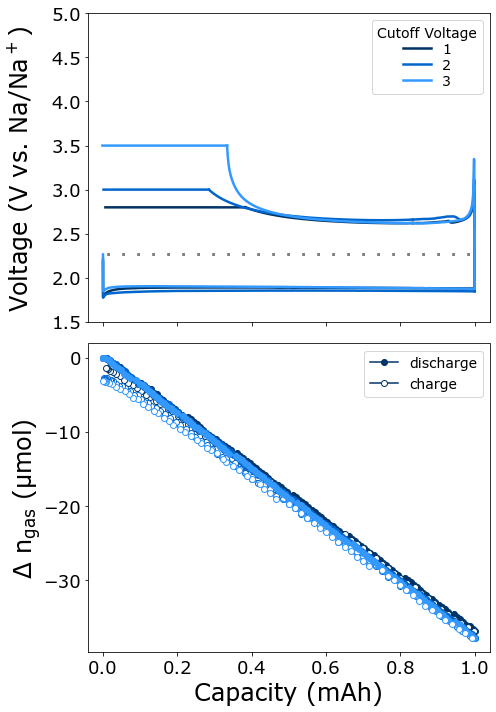

In [18]:
cell2_cycles = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/')
cell2_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/200224_Na_10%binder_MCMB0203_CA_cell2_cycle1_Ch2__2020-02-24_12.42_04.txt')
cell2_2= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/200224_Na_10%binder_MCMB0203_CA_cell2_cycle2_Ch2__2020-02-24_23.18_03.txt')
cell2_3= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/200224_Na_10%binder_MCMB0203_CA_cell2_cycle2_Ch2__2020-02-25_07.42_34.txt')

colors = ['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

o1=plot_CA_cycles(cell2_cycles[1], cell2_cycles[3], cell2_cycles[4], cell2_cycles[5], cell2_1, 2, 1,'#003366' )
o2=plot_CA_cycles(cell2_cycles[8], cell2_cycles[10], cell2_cycles[11], cell2_cycles[12], cell2_2, 2, 2, '#0066CC', offset=o1)
#o3= plot_CA_cycles(cell2_cycles[15], cell2_cycles[17], cell2_cycles[18], cell2_cycles[19], cell2_3, 2, 3, '#3399FF',offset=o1+o2)

ax.legend(title="Cycle #", fontsize=14, loc='upper right', labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge'], fontsize=14)

#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/Cycling graphite CA cell2 - 2cycles.png', transparent= True, dpi=600, bbox_inches='tight')


fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
lithium_ca = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180619_LiNO3_chronoamp_3.8V/180619_LiNO3_chronoamp_3.8V_p_Ch4__2018-06-19_18.37_10.txt')
li_folder = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180619_LiNO3_chronoamp_3.8V/')

plot_CA_cycles(li_folder[2], li_folder[4], li_folder[5], li_folder[5], lithium_ca, 4, 1, '#003366' )


#DIFFERENT CUTOFF VOLTAGE STUDY (could go in SI)

na_ca_28V = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180621_Na_CA_2.8V_cell1/180621_Na_CA_2.8V_cell1_p_Ch3_leak_corrected.txt')
fold_28 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180621_Na_CA_2.8V_cell1/')

na_ca_3V = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180426_Na_CA_1/180426_Na_CA_1_p_Ch1.txt')
fold_3 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180426_Na_CA_1/')

na_ca_35V = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180621_Na_CA_3.5V_cell1/180621_Na_CA_3.5V_cell1_Ch5__2018-06-21_11.23_00.txt')
fold_35 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180621_Na_CA_3.5V_cell1/')
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

plot_CA_cycles(fold_28[3], fold_28[6], fold_28[7], fold_28[8], na_ca_28V, 3, 1, leg='2.8V' )
plot_CA_cycles(fold_3[3], fold_3[6], fold_3[7], fold_3[8], na_ca_3V, 3, 2, leg='3.0V' )

plot_CA_cycles(fold_35[3], fold_35[6], fold_35[7], fold_35[8], na_ca_35V, 5, 3, leg='3.5V' )
ax.legend(title="Cutoff Voltage", fontsize=14, loc='upper center', labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge'], fontsize=14)


leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cutoff Voltage',prop={'size':14})
ax2.legend(labels=['discharge', 'charge'], fontsize=14)



discharge current: -0.5000604668796993
charge current: 0.49991393380733945
o2 consumed: 36.72969834945491
o2 evolved: 35.27416393790824
0.9612325249150404
e- per mol on charge: 1.06137073860351
e- per mol on discharge: 1.0160029153598187
discharge capacity: 1.000160310003493
charge capacity: 0.9998473856184218
charge time (h) : 1.999999975785621
discharge current: -0.5000407171223022
charge current: 0.4999168999337748
o2 consumed: 39.30131456760466
o2 evolved: 33.657199617147185
0.8572108946551326
e- per mol on charge: 1.1104633380704059
e- per mol on discharge: 0.9494891293363507
discharge capacity: 1.000125209490458
charge capacity: 0.9998489750756158
charge time (h) : 1.999999975785621
discharge current: -0.5000145399305556
charge current: 0.4998924102380952
o2 consumed: 8.256622283022239
o2 evolved: 6.463401909720403
0.7887814755672362
e- per mol on charge: 1.7173001164000747
e- per mol on discharge: 1.3420896985630826
discharge capacity: 0.2969896131091648
charge capacity: 0.29690

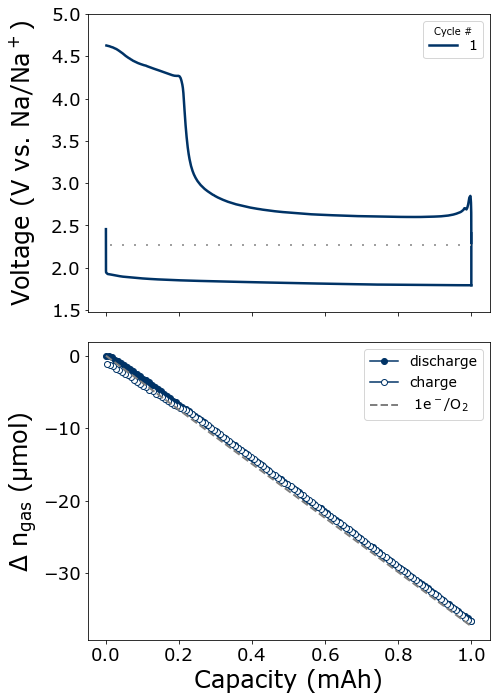

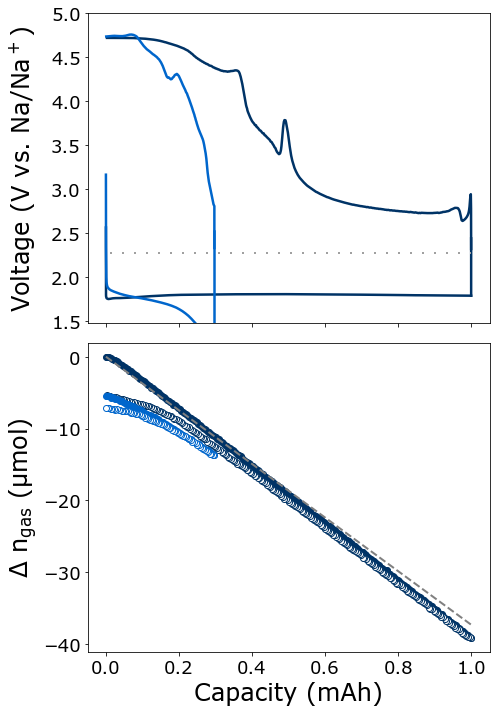

In [20]:
def plot_cycling(disch, chrg, press, channel, cyclenum, n=None, offset=0, eline=False):
    i=cyclenum
    colors=['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']
    n=1
    disc_i= np.mean(disch['I/mA']) #/(np.pi*0.6**2)
    chrg_i= np.mean(chrg['I/mA']) #/(np.pi*0.6**2)
    print('discharge current: ' + str(disc_i))
    print('charge current: ' + str(chrg_i))
    
    #find the final capacity reached on discharge in mAh
    cap=disch['Capacity/mA.h'].iloc[-1]

    x1=disch['Capacity/mA.h'] #/(np.pi*0.6**2)
    y1=disch['Ewe/V']
    x2=(cap-chrg['Capacity/mA.h']) #/(np.pi*0.6**2)
    y2=chrg['Ewe/V']
    
    endindex=-1
    if (i==4):
        endindex=202
    else:
        endindex=-1        
    ax.plot(x1, y1, c=colors[i], linestyle='-', linewidth=2.5, label = str(i))
    ax.plot([x1.iloc[-1], x2.iloc[5] ], [ y1.iloc[-1], y2.iloc[5] ], c=colors[i], linestyle='-', linewidth=2.5, label='')
    ax.plot(x2[:endindex], y2[:endindex], c=colors[i], linestyle='-', label='', linewidth=2.5)
    ax.plot([0.01,cap],[2.27,2.27], c='#A0A0A0', linestyle=(0,(1,5)), linewidth=2)
    
    st1=disch['time/s'].iloc[0]
    end1=disch['time/s'].iloc[-1]
    
    st2=chrg['time/s'].iloc[0]
    end2=chrg['time/s'].iloc[-1]
    
    #determine start and end indices in pressure df for discharge and charge
    st_p1 = getnearpos(press['time/s'],st1)
    end_p1 = getnearpos(press['time/s'],end1)
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    temp = press['temperature/C']+273
    umoles = press['pressure/torr']/760*headspace(channel)/temp/0.082057
    umoles = umoles-umoles.iloc[st_p1]
    elec_oxy= x1.iloc[-1]*3.6/96485/umoles[end_p1]
    
    disch_cap=(press['time/s']-press['time/s'].iloc[st_p1])*-disc_i/3600
    char_cap=cap-(press['time/s']-press['time/s'].iloc[st_p2])*chrg_i/3600 #divide cap by/(np.pi*.6**2)

    gap= umoles[end_p1]-umoles[st_p2]

    x=[0,cap] #/(np.pi*0.6**2)]
    y=[0-offset,-cap*3.6/n/96485*10**6-offset]
    
    ax2.plot(disch_cap[st_p1:end_p1+1], (umoles)[st_p1:end_p1+1]+offset, 'o-', color= colors[i], linewidth=1.5, markersize=6, label='')
    ax2.plot(char_cap[st_p2:(end_p2+1)], (umoles)[st_p2:(end_p2+1)]+gap+offset, 'o-', color=colors[i], linewidth=1.5, markersize=6, mfc='white', label='')
    if eline==True:
        ax2.plot(x, y,  c='grey', linestyle='--', label= '',linewidth= 2)

    print("o2 consumed: " + str(umoles[st_p1]-(umoles[end_p1+1] )))
    print("o2 evolved: " + str(umoles[end_p2]-(umoles[st_p2+1] )))
    print((umoles[end_p2-1]-(umoles[st_p2]))/(umoles[st_p1]-(umoles[end_p1+1])))
    epermol = chrg['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[end_p2-1]-(umoles[st_p2+1]))
    epermold = disch['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[st_p1]-(umoles[end_p1+1]))
    
    print("e- per mol on charge: " + str(epermol))
    print("e- per mol on discharge: " + str(epermold))
    print('discharge capacity: ' + str(disch['Capacity/mA.h'].iloc[-1]))
    print('charge capacity: ' + str(chrg['Capacity/mA.h'].iloc[-1]))
    print('charge time (h) : ' + str((chrg['time/s'].iloc[-1]- chrg['time/s'].iloc[0])/3600))
    ax.tick_params(axis='both', which='major', labelsize=18); ax2.tick_params(axis='both', which='major', labelsize=18)
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', fontsize=24, labelpad = 12); ax2.set_xlabel('Capacity (mAh)', fontsize=24)
    ax2.set_ylabel('$\Delta$ n$_{gas}$ ($\mu$mol)', fontsize=24); plt.tight_layout()
    ax.set_ylim([1.48,5])
    #ax.set_xlim()
    return ( umoles[end_p2-1]+gap )

# cp1_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/')
# cp1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/200226_Na_10%binder_MCMB0203_CP_cell1_cycle1_Ch1__2020-02-26_13.08_19.txt')
# cp2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/200226_Na_10%binder_MCMB0203_CP_cell1_cycle2_Ch1__2020-02-26_23.55_19.txt')
# cp3 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/200226_Na_10%binder_MCMB0203_CP_cell1_cycle3_Ch1__2020-02-27_18.24_27.txt')

# fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
# o1=plot_cycling(cp1_ec[1],cp1_ec[3], cp1, 3, 1, eline=True)
# o2=plot_cycling(cp1_ec[6],cp1_ec[8], cp2, 3, 2, offset=o1)
# o3=plot_cycling(cp1_ec[11],cp1_ec[13], cp3, 3, 3, offset=o1+o2)
# ax.legend(title = "Cycle #", fontsize=14, labelspacing=0.15)
# ax2.legend(labels=['discharge', 'charge', ' 1e$^-$/O$_2$' ], fontsize=14)

cp1_ec_cell1 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/')
cp1_1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/200226_Na_10%binder_MCMB0203_CP_cell1_cycle1_Ch1__2020-02-26_13.08_19.txt')
cp2_1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/200226_Na_10%binder_MCMB0203_CP_cell1_cycle2_Ch1__2020-02-26_23.55_19.txt')
cp3_1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/200226_Na_10%binder_MCMB0203_CP_cell1_cycle3_Ch1__2020-02-27_18.24_27.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
o1=plot_cycling(cp1_ec_cell1[1],cp1_ec_cell1[3], cp1_1, 3, 1, eline=True)
# o2=plot_cycling(cp1_ec_cell1[6],cp1_ec_cell1[8], cp2_1, 3, 2, offset=o1)
# o3=plot_cycling(cp1_ec_cell1[11],cp1_ec_cell1[13], cp3_1, 3, 3, offset=o1+o2)
ax.legend(title = "Cycle #", fontsize=14, labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge', ' 1e$^-$/O$_2$' ], fontsize=14)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/Cycling graphite CP cell1 - 3cycles.png', transparent= True, dpi=600, bbox_inches='tight')

mccp= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CP/200708_Na_MCMB0203_cycling_CP_cycle1_Ch1__2020-07-08_11.54_22.txt')
mccp2=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CP/200708_Na_MCMB0203_cycling_CP_cycle2_Ch1__2020-07-08_17.36_25.txt')
mc = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CP/')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
offset1 = plot_cycling(mc[1],mc[3], mccp, 1, 1, eline=True)
offset2 = plot_cycling(mc[6],mc[8], mccp2, 1, 2, offset=offset1)


discharge current: -0.5000604668796993
charge current: 0.49991393380733945
o2 consumed: 36.85931754438562
o2 evolved: 35.398646548355686
0.9612325249150404
e- per mol on charge: 1.057638330359783
e- per mol on discharge: 1.012430047257266
discharge capacity: 1.000160310003493
charge capacity: 0.9998473856184218
charge time (h) : 1.999999975785621


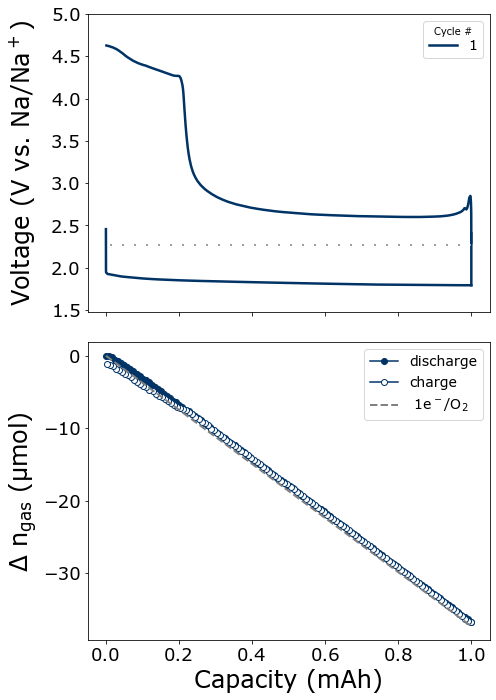

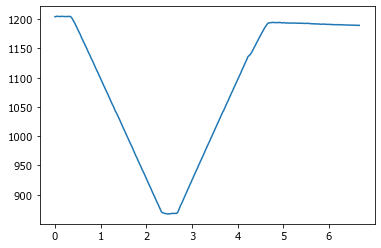

In [18]:
cp1_ec_cell2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/')
cp1_2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell2/200226_Na_10%binder_MCMB0203_CP_cell2_cycle1_Ch2__2020-02-26_13.15_54.txt')
cp2_2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell2/200226_Na_10%binder_MCMB0203_CP_cell2_cycle2_Ch2__2020-02-26_23.55_10.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
o1=plot_cycling(cp1_ec_cell2[1],cp1_ec_cell2[3], cp1_1, 2, 1, eline=True)
#o2=plot_cycling(cp1_ec_cell2[6],cp1_ec_cell2[8], cp1_2, 2, 2, offset=o1)
ax.legend(title = "Cycle #", fontsize=14, labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge', ' 1e$^-$/O$_2$' ], fontsize=14)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell2/Cycling graphite CP cell 2 -bad.png', transparent= True, dpi=600, bbox_inches='tight')


plt.figure()
plt.plot(cp1_1['time/s']/3600, cp1_1['pressure/torr'])
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell2/Cycling graphite CP cell 2 -bad.png', transparent= True, dpi=600, bbox_inches='tight')



charge current (mA): 0.49994473580000004
total moles of gas consumed: 36.3597349038682
total moles of gas evolved: 34.72620083774454
e- per mol on charge: 1.053021266338306
e- per mol on discharge: 1.0202786617839976
discharge capacity: 0.9998882479137844
charge capacity: 0.9758262460430462
charge time (h) : 7.052131756565728
charge cap= 0.9758262460430462
oer/orr: <function oerorr at 0x7f9490dfbb90>
final current= 0.0050650313
charge current (mA): 0.4998507866666667
total moles of gas consumed: 36.28158942817666
total moles of gas evolved: 35.09441595128524
e- per mol on charge: 1.0252205305609445
e- per mol on discharge: 1.0226035756952527
discharge capacity: 1.000120838483175
charge capacity: 0.9583329285184543
charge time (h) : 6.326353534516727
charge cap= 0.9583329285184543
oer/orr: <function oerorr at 0x7f9490dfbb90>
final current= 0.0050726634999999996
charge current (mA): 0.4999917981632654
total moles of gas consumed: 37.99025805173106
total moles of gas evolved: 34.702436406

(1200.0, 1230.0)

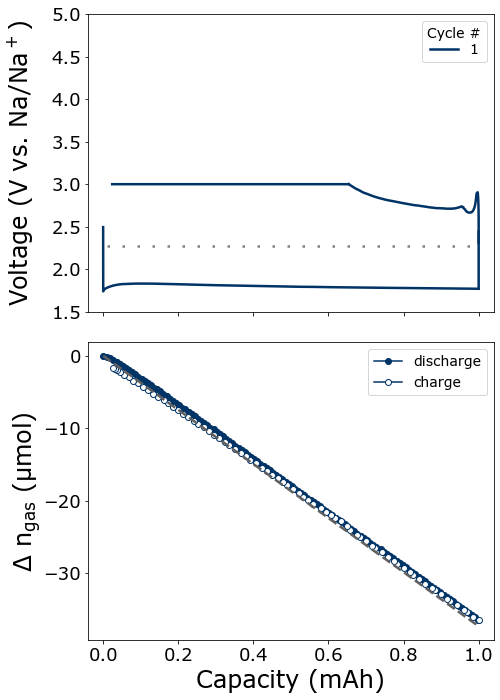

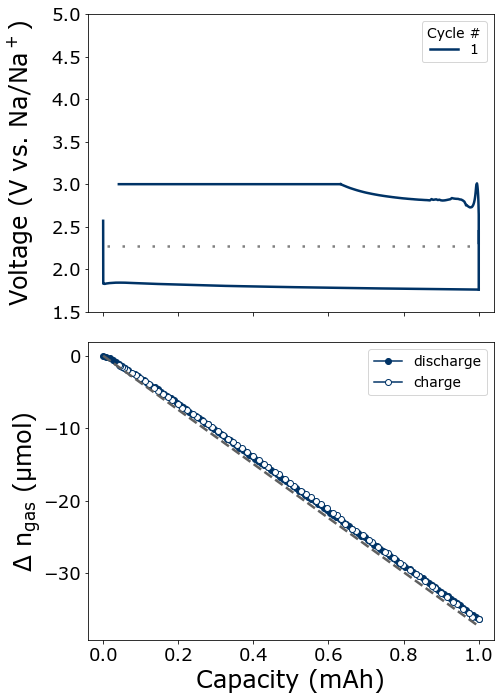

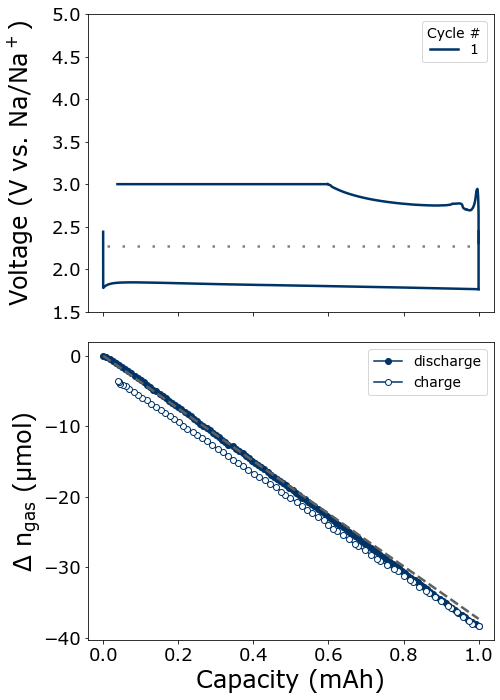

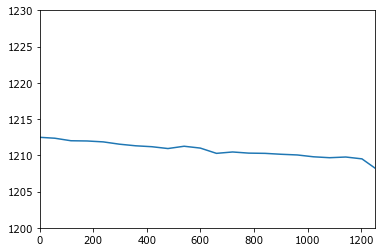

In [13]:
ca1p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200119_10%binder_MCMB1202_cycling_CA_cell1/200119_10%binder_MCMB1202_cycling_CA_cell1_cycle1_Ch1__2020-01-19_12.06_04.txt')
ca1= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200119_10%binder_MCMB1202_cycling_CA_cell1/')
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

plot_CA_cycles(ca1[1], ca1[3], ca1[4], ca1[5], ca1p, 1, 1,'#003366' )

leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge'], fontsize=14)


ca2p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell1/200224_Na_10%binder_MCMB0203_CA_cell1_cycle1_Ch1__2020-02-24_12.22_00.txt')
ca2= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell1/')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

plot_CA_cycles(ca2[1], ca2[3], ca2[4], ca2[5], ca2p, 1, 1,'#003366' )

leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge'], fontsize=14)

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 


ca3p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/200224_Na_10%binder_MCMB0203_CA_cell2_cycle1_Ch2__2020-02-24_12.42_04.txt')
ca3= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/')
ca3p_2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/200224_Na_10%binder_MCMB0203_CA_cell2_cycle2_Ch2__2020-02-24_23.18_03.txt')
plot_CA_cycles(ca3[1], ca3[3], ca3[4], ca3[5], ca3p, 2, 1,'#003366' )
#plot_CA_cycles(ca3[8], ca3[10], ca3[11], ca3[12], ca3p_2, 2, 2 )


leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge'], fontsize=14)

plt.figure()
plt.plot(ca3p['time/s'], ca3p['pressure/torr'])
plt.xlim(0,1250)
plt.ylim(1200,1230)



discharge current: -0.49992472923913045
charge current: 0.5000597580803571
o2 consumed: 39.37294708428941
o2 evolved: 33.77049678211979
0.8559907425013191
e- per mol on charge: 1.1111226677290753
e- per mol on discharge: 0.9475484338714629
discharge capacity: 0.9999001688427396
charge capacity: 1.0001422299279108
charge time (h) : 1.999999975785621


-5.450262849098323

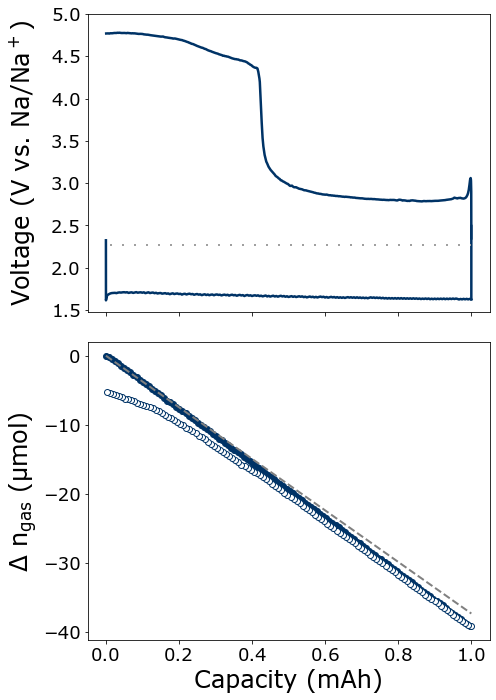

In [14]:
cp1p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200114_10%binder_MCMB1202_cycling_CP/200114_10%binder_MCMB1202_cycling_CP_cycle1_Ch4__2020-01-14_17.58_33.txt')
cp1=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200114_10%binder_MCMB1202_cycling_CP/')


fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10))

plot_cycling(cp1[1], cp1[3], cp1p, 4, 1, eline = True)


total moles of gas consumed: 37.528583083731746
total moles of gas evolved: 33.51268489095777
e- per mol on charge: 1.9059627397189998
e- per mol on discharge: 0.9920285295550925
discharge capacity: 0.9994910822974312
charge capacity: 0.988035442100631
charge time (h) : 3.238175071905919
charge cap= 0.988035442100631
oer/orr: <function oerorr at 0x7ff462b9a710>
final current= 0.015009271000000001


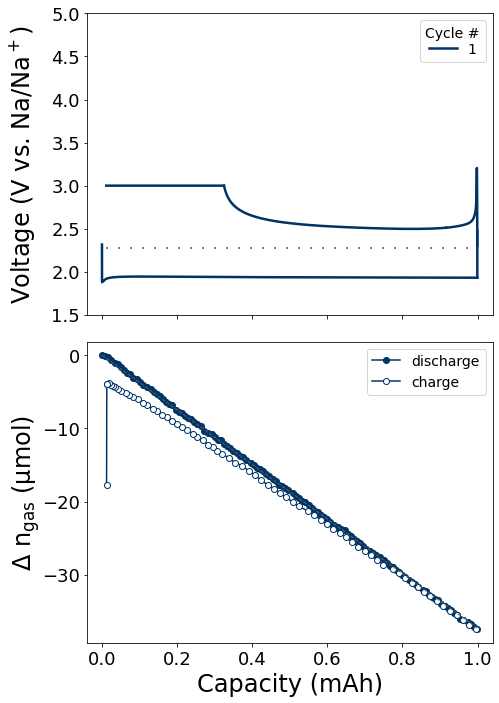

In [96]:
#p50 chronoamp cell

p50_p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180823_Na_cycling_chronoamp_cell2/180823_Na_cycling_chronoamp_cell2_cycle1_p_Ch4__2018-08-23_14.51_59.txt')
p50_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180823_Na_cycling_chronoamp_cell2/')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

plot_CA_cycles(p50_ec[3], p50_ec[6], p50_ec[7], p50_ec[8], p50_p, 2, 1,'#003366' )
#plot_CA_cycles(ca3[8], ca3[10], ca3[11], ca3[12], ca3p_2, 2, 2 )


leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge'], fontsize=14)



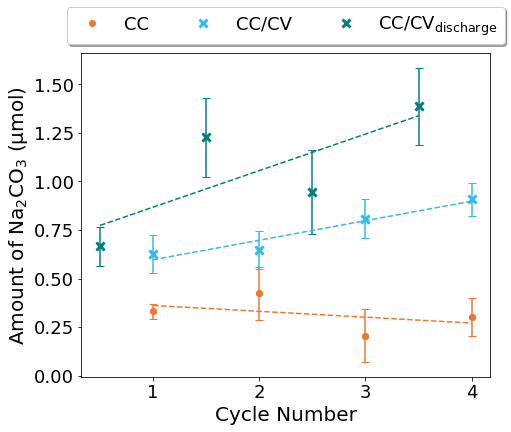

In [181]:
cycle = [1,2,3,4]
cycle_disch = [0.5, 1.5, 2.5, 3.5,]
p50_cp = [0.330392849, 0.424291384, 0.205956064, 0.302306521]
p50_ca = [0.625999057, 0.647896226, 0.808971698, 0.907768868]
ca_disch = [0.665298636, 1.227110752, 0.944949126, 1.387207034]

cp_error = [0.037585399, 0.136794986, 0.1367, 0.097999788]
ca_error = [0.1, 0.09639333, 0.1, 0.083498638]
ca_disch_error = [0.100013055, 0.20476212, 0.217551171, 0.2]

z = np.polyfit(cycle, p50_cp, 1)
fit_cp = np.poly1d(z)
z2 = np.polyfit(cycle, p50_ca, 1)
fit_ca = np.poly1d(z2)
z3 = np.polyfit(cycle_disch, ca_disch, 1)
fit_ca_disch = np.poly1d(z3)


fig, (ax)= plt.subplots(1, figsize= (7,6)) 

plt.plot(cycle, p50_cp, 'o', label = 'CC', color ='#EE7733')
plt.plot(cycle, p50_ca, 'x', label = 'CC/CV', color ='#33BBEE' , markersize = 8, markeredgewidth =3)
plt.plot(cycle_disch, ca_disch, 'x', label = 'CC/CV', color = '#008080', markersize = 8, markeredgewidth =3)

plt.plot(cycle ,fit_cp(cycle),"--", color='#EE7733')
plt.plot(cycle ,fit_ca(cycle),"--", color='#33BBEE')
plt.plot(cycle_disch ,fit_ca_disch(cycle_disch),"--", color='#008080')






plt.errorbar(cycle, p50_cp, yerr= cp_error, fmt='o', capsize=4, markersize=6, linestyle = 'None', label = 'CC', color='#EE7733')
plt.errorbar(cycle, p50_ca, yerr= ca_error, fmt='x', capsize=4, markersize=8, linestyle = 'None', label = 'CC/CV', color='#33BBEE')
plt.errorbar(cycle_disch, ca_disch, yerr= ca_disch_error, fmt='x', capsize=4, markersize=8, linestyle = 'None', label = 'CC/CV', color='#008080')




ax.legend(labels=['CC', 'CC/CV', 'CC/CV$_{discharge}$'], fontsize=18, loc='upper center', bbox_to_anchor=(0.5, 1.17), ncol=3, fancybox=True, shadow=True)
ax.set_ylabel('Amount of Na$_2$CO$_3$ ($\mu$mol)', fontsize=20)
ax.set_xlabel('Cycle Number', fontsize=20); plt.tight_layout()
ax.tick_params(axis='both', which='major', labelsize=18)

#plt.savefig('/Users/kedzie/Desktop/Carbonate titrations versus cycling.pdf', transparent= True, dpi=800, bbox_inches='tight')


discharge current: -0.49984176109890105
charge current: 1.0000790578971963
o2 consumed: 37.05004866800189
o2 evolved: 33.13265296406985
0.8957836942719037
e- per mol on charge: 1.1422645497740567
e- per mol on discharge: 1.0067898128759718
discharge capacity: 0.9997349977493286
charge capacity: 1.000121633211772
charge time (h) : 0.9999999878928065
discharge current: -0.49986098996376815
charge current: 1.000073942347418
o2 consumed: 36.17020741939527
o2 evolved: 33.466523832645805
0.9284821309960242
e- per mol on charge: 1.1246006455640964
e- per mol on discharge: 1.0313002917770742
discharge capacity: 0.9997546672821044
charge capacity: 1.000126865175035
charge time (h) : 0.9999999878928065
discharge current: -0.49985683285714294
charge current: 1.0000714683663368
o2 consumed: 35.27467122066135
o2 evolved: 32.81555407629439
0.9319225033715356
e- per mol on charge: 1.1498503200083754
e- per mol on discharge: 1.0574730551607643
discharge capacity: 0.9997457928127712
charge capacity: 1.

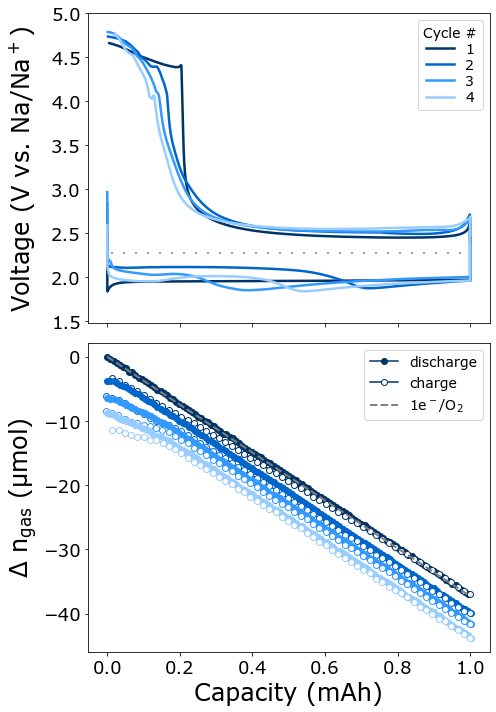

In [14]:
# P50 CP 4 cycles 

p50p1_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/cell1_cycle1_Ch3__2018-09-10_13.00_13.txt')
p50p2_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/cell1_cycle2_Ch3__2018-09-10_17.40_12.txt')
p50p3_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/cell1_cycle3_Ch3__2018-09-10_21.36_59.txt')
p50p4_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/cell1_cycle4_Ch3__2018-09-11_08.44_02.txt')
p50_folder_1= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
o1=plot_cycling(p50_folder_1[3],p50_folder_1[5], p50p1_1, 3, 1, eline=True)
o2=plot_cycling(p50_folder_1[10],p50_folder_1[12], p50p2_1, 3, 2, offset=o1)
o3=plot_cycling(p50_folder_1[17],p50_folder_1[19], p50p3_1, 3, 3, offset=o1+o2)
o4=plot_cycling(p50_folder_1[24],p50_folder_1[27], p50p4_1, 3, 4, offset=o1+o2+o3)

leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':14})
ax2.legend(labels=['discharge', 'charge', '1e$^-$/O$_2$'], fontsize=14)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/180910_Na_p50 cp cycling.pdf', transparent= True, dpi=800, bbox_inches='tight')



print(o1, o1+o2+o3+o4)

1036
0.015056366000000002
total moles of gas consumed: 18.478501460199354
total moles of gas evolved: 10.35147114611324
e- per mol on charge: 2.42499746548708
e- per mol on discharge: 2.0138874492099634
discharge capacity: 0.999902023209466
charge capacity: 0.6749429305394491
charge time (h) : 31.79706944451816
charge cap= 0.6749429305394491
oer/orr: <function oerorr at 0x7f9490dfbb90>
final current= 0.00502769


-8.107794782806153

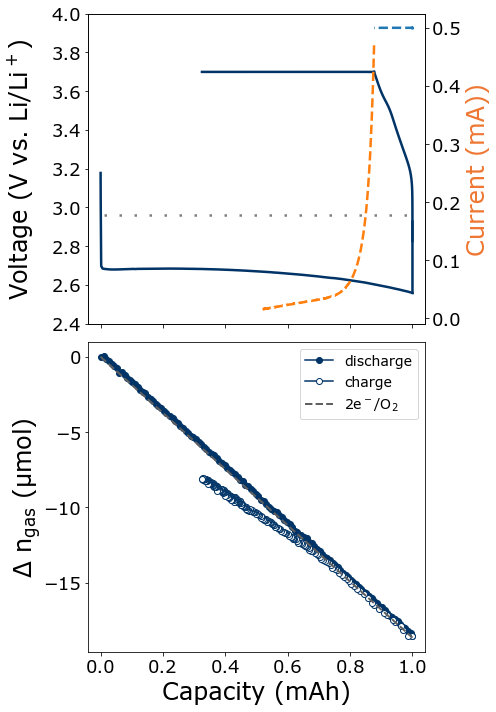

In [46]:

liCA5p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200706_Li_CA_3.7V_LiNO3/200706_Li_CA_3.7V_LiNO3_pressure_Ch4__2020-07-06_12.45_51.txt')
liCA5 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200706_Li_CA_3.7V_LiNO3/')
plot_CA_lithium(liCA5[1], liCA5[3], liCA5[4], liCA5p, 4, 1, n=2 )
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200706_Li_CA_3.7V_LiNO3/200706_Li_CA_3.7V_LiNO3.pdf', transparent= True, dpi=800, bbox_inches='tight')



In [45]:
def plot_CA_lithium(discharge, cp1, ca, press, ch, cyclenum=1, leg=None, offset=0, n=2):
    
    i_dis = -1*np.mean( discharge['I/mA'] ) #calculate discharge and charge current (mA)
    i_ch = np.mean(cp1['I/mA'])
    ca['Capacity/mA.h'] = ca['Capacity/mA.h'] + cp1['Capacity/mA.h'].iloc[-1]   
    umoles = press['pressure/torr']/760*headspace(ch)/(press['temperature/C']+273)/0.082057
    umoles = umoles-umoles.iloc[0]
    col = ['#003366', '#0066CC', '#3399FF', '#99CCFF']
    
    cap = []
    curr = []
    files_ec = pd.concat([discharge, cp1, ca], sort=True) 
    
    cutoff = 0
    for count in range(len(ca['I/mA'])):
        if ca['I/mA'].iloc[count] > 0.015:
            cutoff=cutoff+1
        else:
            cutoff =cutoff
    print(cutoff)
    print(ca['I/mA'].iloc[cutoff])
    eccutoff = 0
    for i in range(len(umoles)):
        dex = getnearpos( files_ec['time/s'], press['time/s'].iloc[i] )
        cap.append( files_ec['Capacity/mA.h'].iloc[dex] )
        curr.append( files_ec['I/mA'].iloc[dex] )
        if files_ec['I/mA'].iloc[dex] >0.015:
            eccutoff=eccutoff+1
    print(ca['I/mA'].iloc[cutoff])
    
    umolesdf = pd.DataFrame( press['time/s'], columns=['time/s'] )
    umolesdf['umoles'] = umoles
    umolesdf['Capacity/mA.h'] = cap
    umolesdf['I/mA'] = curr
    
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=cp1['time/s'].iloc[0]
    end2=cp1['time/s'].iloc[-1]
#     st3=cp2['time/s'].iloc[0]
#     end3=cp2['time/s'].iloc[-1]
    st4=ca['time/s'].iloc[0]
    end4=ca['time/s'].iloc[-1]
    end_cap = [discharge['Capacity/mA.h'].iloc[-1], cp1['Capacity/mA.h'].iloc[-1], ca['Capacity/mA.h'].iloc[-1]]

    fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10))
    ax3=ax.twinx()

    ax.plot((discharge['Capacity/mA.h']), discharge['Ewe/V'], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label = cyclenum )
    ax.plot([end_cap[0], end_cap[0]-cp1['Capacity/mA.h'].iloc[5] ], [discharge['Ewe/V'].iloc[-1], cp1['Ewe/V'].iloc[5] ], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label='') #this line just connects the discharge to charge lines
    ax.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['Ewe/V'], color=col[cyclenum-1], label='', linewidth=2.5)
    ax.plot(end_cap[0]- ca['Capacity/mA.h'], ca['Ewe/V'], color= col[cyclenum-1], linewidth=2.5, label='') 
    ax.plot([0.01, 1.0],[2.27,2.27], c='grey', linestyle=(0,(1,5)), linewidth=2.5, label='')
    ax3.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['I/mA'], label='', linestyle='--', linewidth=2.5)
    ax3.plot(end_cap[0]-ca['Capacity/mA.h'][:cutoff], ca['I/mA'][:cutoff], label='', linestyle='--', linewidth=2.5)



    st_p1 = getnearpos(press['time/s'],st1) #find time at beginning of discharge
    end_p1 = getnearpos(press['time/s'],end1) #find time at end of discharge
    
    st_p2 = getnearpos(press['time/s'],st2) #start of charge cp1
    end_p2 = getnearpos(press['time/s'],end2)
    
    st_p4 = getnearpos(press['time/s'],st4)
    end_p4 = getnearpos(press['time/s'],end4) #end of charge chronoamperometry
    
    umolesdf['umoles'] = umolesdf['umoles']-umolesdf['umoles'].iloc[st_p1]
    
    x=[0, end_cap[0]]
    y=[0+offset,-end_cap[0]*3.6/n/96485*10**6+offset]
    
    print('total moles of gas consumed: ' + str(-umolesdf['umoles'].iloc[end_p1]+umoles.iloc[st_p1]))
    print('total moles of gas evolved: ' + str(umoles.iloc[end_p4]-umoles.iloc[st_p2]))
    
    epermol = ca['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[end_p4-1]-(umoles[st_p2+1]))
    epermold = discharge['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[st_p1]-(umoles[end_p1+1]))
    
    print("e- per mol on charge: " + str(epermol))
    print("e- per mol on discharge: " + str(epermold))
    print('discharge capacity: ' + str(discharge['Capacity/mA.h'].iloc[-1]))
    print('charge capacity: ' + str(ca['Capacity/mA.h'].iloc[-1]))
    print('charge time (h) : ' + str((ca['time/s'].iloc[-1]- cp1['time/s'].iloc[0])/3600))
    print('charge cap= ' + str( ca['Capacity/mA.h'].iloc[-1] ) )
    print('oer/orr: '+ str(oerorr))
    print('final current= ' + str(ca['I/mA'].iloc[-1]))
    pressure_gap=umoles.iloc[end_p1]-umoles.iloc[st_p2]
    
    ax2.plot(umolesdf['Capacity/mA.h'][st_p1:end_p1+1], umolesdf['umoles'][st_p1:end_p1+1]+offset,  'o-', color= '#003366', linewidth=1.5, markersize=6, label='')#, markevery=(0.0,0.02))
    ax2.plot(end_cap[0]-umolesdf['Capacity/mA.h'][st_p2:end_p4-1], (umolesdf['umoles'])[st_p2:end_p4-1]+pressure_gap+offset,  'o-', color='#003366', linewidth=1.5, markersize=6, mfc='white', markevery=(0.0,0.012), label='')
    if cyclenum ==1:
        ax2.plot(x,y, color='#606060', linestyle='--', label= '',linewidth= 2)
    
    ax.set_ylabel('Voltage (V vs. Li/Li$^+$)', fontsize=24, labelpad = 14 )
    ax2.set_ylabel('$\Delta$ n$_{gas}$ ($\mu$mol)', fontsize=24, labelpad=0)
    ax2.set_xlabel('Capacity (mAh)', fontsize=24)
    ax3.set_ylabel('Current (mA))', fontsize=24, color='#EE7733' )
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    ax3.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xlim([-0.04,1.04])
    ax.set_ylim([2.4,4])
    ax2.legend(labels=['discharge', 'charge', '2e$^-$/O$_2$'], fontsize=14)
    ax.plot([0.01, 1.0],[2.96,2.96], c='grey', linestyle=(0,(1,5)), linewidth=2.5, label='')

    plt.tight_layout()
    return ( umolesdf['umoles'][end_p4-1]+pressure_gap )

